<a href="https://colab.research.google.com/github/oulbacha-ilyas/Machine-Learning-For-Stock-Market-Prediction/blob/main/experiment4dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Data Preprocessing

In [ ]:
####Selecting the best structure


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Normalizer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import statistics
from datetime import datetime


dataset=pd.read_csv("fixations.csv")
fixationX=dataset[["start timestamp [ns]","end timestamp [ns]","duration [ms]","fixation x [px]"]]

facebook=pd.read_csv("Facebook.csv")
apple=pd.read_csv("Apple.csv")
amazon=pd.read_csv("Amazon.csv")
netflix=pd.read_csv("Netflix.csv")
google=pd.read_csv("Google.csv")


### replacing missing values
mean = facebook['Open'].mean()
facebook['Open'].fillna(mean, inplace=True)
mean = facebook['High'].mean()
facebook['High'].fillna(mean, inplace=True)
mean = facebook['Low'].mean()
facebook['Low'].fillna(mean, inplace=True)
mean = facebook['Close'].mean()
facebook['Close'].fillna(mean, inplace=True)
mean = facebook['Adj Close'].mean()
facebook['Adj Close'].fillna(mean, inplace=True)
mean = facebook['Volume'].mean()
facebook['Volume'].fillna(mean, inplace=True)

mean = apple['Open'].mean()
apple['Open'].fillna(mean, inplace=True)
mean = apple['High'].mean()
apple['High'].fillna(mean, inplace=True)
mean = apple['Low'].mean()
apple['Low'].fillna(mean, inplace=True)
mean = apple['Close'].mean()
apple['Close'].fillna(mean, inplace=True)
mean = apple['Adj Close'].mean()
apple['Adj Close'].fillna(mean, inplace=True)
mean = apple['Volume'].mean()
apple['Volume'].fillna(mean, inplace=True)

mean = amazon['Open'].mean()
amazon['Open'].fillna(mean, inplace=True)
mean = amazon['High'].mean()
amazon['High'].fillna(mean, inplace=True)
mean = amazon['Low'].mean()
amazon['Low'].fillna(mean, inplace=True)
mean = amazon['Close'].mean()
amazon['Close'].fillna(mean, inplace=True)
mean = amazon['Adj Close'].mean()
amazon['Adj Close'].fillna(mean, inplace=True)
mean = amazon['Volume'].mean()
amazon['Volume'].fillna(mean, inplace=True)

mean = netflix['Open'].mean()
netflix['Open'].fillna(mean, inplace=True)
mean = netflix['High'].mean()
netflix['High'].fillna(mean, inplace=True)
mean = netflix['Low'].mean()
netflix['Low'].fillna(mean, inplace=True)
mean = netflix['Close'].mean()
netflix['Close'].fillna(mean, inplace=True)
mean = netflix['Adj Close'].mean()
netflix['Adj Close'].fillna(mean, inplace=True)
mean = netflix['Volume'].mean()
netflix['Volume'].fillna(mean, inplace=True)

mean = google['Open'].mean()
google['Open'].fillna(mean, inplace=True)
mean = google['High'].mean()
google['High'].fillna(mean, inplace=True)
mean = google['Low'].mean()
google['Low'].fillna(mean, inplace=True)
mean = google['Close'].mean()
google['Close'].fillna(mean, inplace=True)
mean = google['Adj Close'].mean()
google['Adj Close'].fillna(mean, inplace=True)
mean = google['Volume'].mean()
google['Volume'].fillna(mean, inplace=True)


facebook['Date']=facebook['Date'].astype('string')
amazon['Date']=amazon['Date'].astype('string')
apple['Date']=apple['Date'].astype('string')
netflix['Date']=netflix['Date'].astype('string')
google['Date']=google['Date'].astype('string')



### changing date to timestamp
format = "%Y-%m-%d"
facebook['timestamp']=np.nan

for i in facebook.index:
  date_string = facebook.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  facebook.iloc[i,7]=timestamp

facebook['Date']=facebook['timestamp']
facebook=facebook.drop(['timestamp'],axis=1)
facebook= facebook.rename(columns = {"Date":"Timestamp"})
facebook.head()

#####
format = "%Y-%m-%d"
amazon['timestamp']=np.nan

for i in amazon.index:
  date_string = amazon.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  amazon.iloc[i,7]=timestamp

amazon['Date']=amazon['timestamp']
amazon=amazon.drop(['timestamp'],axis=1)
amazon= amazon.rename(columns = {"Date":"Timestamp"})
amazon.head()

format = "%Y-%m-%d"
apple['timestamp']=np.nan

for i in apple.index:
  date_string = apple.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  apple.iloc[i,7]=timestamp

apple['Date']=apple['timestamp']
apple=apple.drop(['timestamp'],axis=1)
apple= apple.rename(columns = {"Date":"Timestamp"})
apple.head()

format = "%Y-%m-%d"
netflix['timestamp']=np.nan

for i in netflix.index:
  date_string = netflix.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  netflix.iloc[i,7]=timestamp

netflix['Date']=netflix['timestamp']
netflix=netflix.drop(['timestamp'],axis=1)
netflix= netflix.rename(columns = {"Date":"Timestamp"})
netflix.head()

format = "%Y-%m-%d"
google['timestamp']=np.nan

for i in google.index:
  date_string = google.iloc[i,0]
  date = datetime.strptime(date_string, format)
  timestamp = int(round(date.timestamp()))
  google.iloc[i,7]=timestamp

google['Date']=google['timestamp']
google=google.drop(['timestamp'],axis=1)
google= google.rename(columns = {"Date":"Timestamp"})
google.head()



fixationX.describe()
#####


,start timestamp [ns],end timestamp [ns],duration [ms],fixation x [px]
count,1.023000e+03,1.023000e+03,1023.000000,1023.000000
mean,1.649869e+18,1.649869e+18,475.372434,573.489254
std,1.749428e+11,1.749531e+11,576.859891,134.203456
min,1.649868e+18,1.649868e+18,63.000000,151.086000
25%,1.649868e+18,1.649868e+18,216.000000,485.183500
50%,1.649869e+18,1.649869e+18,324.000000,537.795000
75%,1.649869e+18,1.649869e+18,542.000000,670.053000
max,1.649869e+18,1.649869e+18,10239.000000,1026.711000


# 2) Machine Learning Models Comparison

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

   Size     RMSE LR Adjusted R2    RMSE ANN  Difference                stdev
0   0.1  133.676601    0.004688   157.78342   24.106819  165258086447.028625
1   0.2  133.711378    0.005465  157.727284   24.015905  148866564856.846527
2   0.3  133.723716    0.003951  154.941974   21.218259  124193622200.168213
3   0.4  133.837882    0.003032   158.40181   24.563929   94751797936.776077
4   0.5  133.896893    0.002848  156.760047   22.863154   68856609988.919617
5   0.6  133.821039     0.00386  157.389327   23.568288   41179446654.722183
6   0.7  133.966303    0.003234  141.303729    7.337426   27740038932.651714
7   0.8  133.873225    0.002909  159.944848   26.071623    9220806042.859709
8   0.9   133.74648    0.003033  255.013573  121.267093    4646575359.188508


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


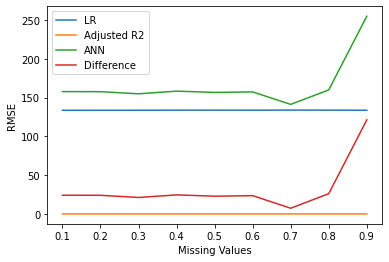

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]


results_fix=pd.DataFrame(columns=['Size','RMSE LR','Adjusted R2','RMSE ANN','Difference','stdev'])
results_fix['Size']=sizes

for i in range(9):

  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_missing=fixationX.sample(n=round(1023*sizes[i]))
  
  ##Get the mean value of the non missing values
  list_not_missing=[]
  for j in range(1023) :
    if j not in fixationX_missing.index :
      list_not_missing.append(j)

  not_missing=pd.DataFrame(columns=fixationX.columns)
  for k in list_not_missing:
    not_missing=not_missing.append(fixationX.iloc[k,:])

  not_missing_mean=statistics.mean(not_missing["start timestamp [ns]"])
  #print("not missing mean",not_missing_mean)

  ## Assign the mean to the missing values
  
  for l in  fixationX_missing.index :
    fixationX.loc[l,"start timestamp [ns]"]=not_missing_mean
  
  new_mean=statistics.mean(fixationX["start timestamp [ns]"])

  #print("dataset new mean =",new_mean)

  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}'.format(sizes[i]))
  #plt.show()

  ######training the models
  ###Linear Regression
  X=fixationX[["start timestamp [ns]","duration [ms]"]]
  y=fixationX['fixation x [px]']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  
  results_fix.iloc[i,1]=rmse_test
  results_fix.iloc[i,2]=adj_r2
  
  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test['start timestamp [ns]']
  #b = X_test['end timestamp [ns]']
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Vs Test Fixation, Missing Values ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  results_fix.iloc[i,3]=rmse_test

  #variance of the target variable in the missing values sample
  results_fix.iloc[i,5]=statistics.stdev(fixationX["start timestamp [ns]"])

  i+=1


results_fix['Difference']=results_fix['RMSE ANN']-results_fix['RMSE LR']
print(results_fix)
x = results_fix['Size']
#Y = results[['RMSE LR','Adjusted R2','RMSE ANN','Difference']]
fig,axes=plt.subplots()
plt.plot(x,results_fix['RMSE LR'],label="LR")
plt.plot(x,results_fix['Adjusted R2'],label="Adjusted R2")
plt.plot(x,results_fix['RMSE ANN'],label="ANN")
plt.plot(x,results_fix['Difference'],label="Difference")

plt.xlabel("Missing Values")
plt.ylabel("RMSE")
plt.legend()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

   Size          RMSE LR Adjusted R2         RMSE ANN      Difference  \
0   0.1  21462211.789577    0.193858  21941039.809347    478828.01977   
1   0.2  22135153.732389    0.164264  25013485.730553  2878331.998163   
2   0.3  22611574.448838    0.133459  22995918.501841   384344.053003   
3   0.4  23207982.942601    0.092162  25013485.421496  1805502.478895   
4   0.5  23724349.580587    0.067613  25013485.724334  1289136.143747   
5   0.6   24094615.30713    0.050646  23259068.086426  -835547.220703   
6   0.7  24510428.828568    0.027424  25013485.724398    503056.89583   
7   0.8   24704212.11315    0.017737  25013485.724133   309273.610983   
8   0.9  24829849.578207    0.009662  25013485.986285   183636.408078   

       stdev  
0  61.367596  
1  60.204039  
2  57.810659  
3  54.132072  
4  48.578737  
5  42.179431  
6  35.947152  
7  29.717445  
8   22.13642  


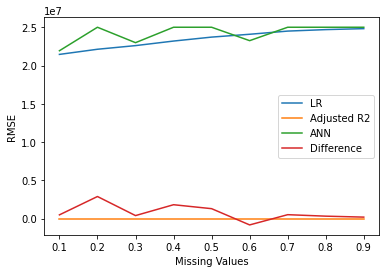

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]

dataset=facebook[['Close','Volume']]
results_fb=pd.DataFrame(columns=['Size','RMSE LR','Adjusted R2','RMSE ANN','Difference','stdev'])
results_fb['Size']=sizes

for i in range(9):

  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_missing=dataset.sample(n=round(1023*sizes[i]))
  
  ##Get the mean value of the non missing values
  list_not_missing=[]
  for j in range(1023) :
    if j not in fixationX_missing.index :
      list_not_missing.append(j)

  not_missing=pd.DataFrame(columns=dataset.columns)
  for k in list_not_missing:
    not_missing=not_missing.append(dataset.iloc[k,:])

  not_missing_mean=statistics.mean(not_missing["Close"])
  #print("not missing mean",not_missing_mean)

  ## Assign the mean to the missing values
  
  for l in  fixationX_missing.index :
    dataset.loc[l,"Close"]=not_missing_mean
  
  new_mean=statistics.mean(dataset["Close"])

  #print("dataset new mean =",new_mean)

  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}'.format(sizes[i]))
  #plt.show()

  ######training the models
  ###Linear Regression
  X=dataset[["Close"]]
  y=dataset['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  
  results_fb.iloc[i,1]=rmse_test
  results_fb.iloc[i,2]=adj_r2
  
  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test['start timestamp [ns]']
  #b = X_test['end timestamp [ns]']
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Vs Test Fixation, Missing Values ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  results_fb.iloc[i,3]=rmse_test

  #variance of the target variable in the missing values sample
  results_fb.iloc[i,5]=statistics.stdev(dataset["Close"])

  i+=1


results_fb['Difference']=results_fb['RMSE ANN']-results_fb['RMSE LR']
print(results_fb)
x = results_fb['Size']
#Y = results[['RMSE LR','Adjusted R2','RMSE ANN','Difference']]
fig,axes=plt.subplots()
plt.plot(x,results_fb['RMSE LR'],label="LR")
plt.plot(x,results_fb['Adjusted R2'],label="Adjusted R2")
plt.plot(x,results_fb['RMSE ANN'],label="ANN")
plt.plot(x,results_fb['Difference'],label="Difference")

plt.xlabel("Missing Values")
plt.ylabel("RMSE")
plt.legend()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

   Size         RMSE LR Adjusted R2        RMSE ANN     Difference       stdev
0   0.1  7278814.128927    0.053121  7176035.710307  -102778.41862    592.3881
1   0.2  7284637.488969    0.050561  7239671.333764  -44966.155205  585.698346
2   0.3   7297737.13842    0.047266  7063298.535631 -234438.602789  573.046428
3   0.4  7312231.837665    0.043636  7326842.429669   14610.592004  560.235829
4   0.5    7332131.0153    0.038326  7113735.335457 -218395.679844  544.481563
5   0.6  7355146.555676    0.032681  7487903.658991  132757.103316   525.34199
6   0.7   7378841.90037    0.027187  7228249.442737 -150592.457632  501.335128
7   0.8  7396957.513847    0.023267   7407836.01525   10878.501402   471.24833
8   0.9  7410951.333381    0.020407  7394842.169736  -16109.163645   440.28497


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


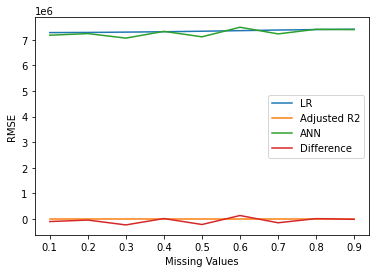

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]

dataset=amazon[['Close','Volume']]
results_am=pd.DataFrame(columns=['Size','RMSE LR','Adjusted R2','RMSE ANN','Difference','stdev'])
results_am['Size']=sizes

for i in range(9):

  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_missing=dataset.sample(n=round(1023*sizes[i]))
  
  ##Get the mean value of the non missing values
  list_not_missing=[]
  for j in range(1023) :
    if j not in fixationX_missing.index :
      list_not_missing.append(j)

  not_missing=pd.DataFrame(columns=dataset.columns)
  for k in list_not_missing:
    not_missing=not_missing.append(dataset.iloc[k,:])

  not_missing_mean=statistics.mean(not_missing["Close"])
  #print("not missing mean",not_missing_mean)

  ## Assign the mean to the missing values
  
  for l in  fixationX_missing.index :
    dataset.loc[l,"Close"]=not_missing_mean
  
  new_mean=statistics.mean(dataset["Close"])

  #print("dataset new mean =",new_mean)

  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}'.format(sizes[i]))
  #plt.show()

  ######training the models
  ###Linear Regression
  X=dataset[["Close"]]
  y=dataset['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  
  results_am.iloc[i,1]=rmse_test
  results_am.iloc[i,2]=adj_r2
  
  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test['start timestamp [ns]']
  #b = X_test['end timestamp [ns]']
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Vs Test Fixation, Missing Values ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  results_am.iloc[i,3]=rmse_test

  #variance of the target variable in the missing values sample
  results_am.iloc[i,5]=statistics.stdev(dataset["Close"])

  i+=1


results_am['Difference']=results_am['RMSE ANN']-results_am['RMSE LR']
print(results_am)
x = results_am['Size']
#Y = results[['RMSE LR','Adjusted R2','RMSE ANN','Difference']]
fig,axes=plt.subplots()
plt.plot(x,results_am['RMSE LR'],label="LR")
plt.plot(x,results_am['Adjusted R2'],label="Adjusted R2")
plt.plot(x,results_am['RMSE ANN'],label="ANN")
plt.plot(x,results_am['Difference'],label="Difference")

plt.xlabel("Missing Values")
plt.ylabel("RMSE")
plt.legend()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

   Size           RMSE LR Adjusted R2          RMSE ANN       Difference  \
0   0.1  362129471.302976    0.019804  361969205.938443   -160265.364533   
1   0.2  362183957.158988    0.019313  344178695.537321 -18005261.621667   
2   0.3  362396303.125555    0.018755  347509186.956629 -14887116.168925   
3   0.4  362540305.296431    0.017389  311141410.134534 -51398895.161897   
4   0.5  362824013.488241    0.016263  353772434.823361   -9051578.66488   
5   0.6  363030321.637788    0.015216  364770932.748598    1740611.11081   
6   0.7  363303789.745361    0.013644  365875396.193049   2571606.447688   
7   0.8  363344965.181967    0.012555  365783835.914491   2438870.732524   
8   0.9  363539786.090268      0.0115  365420939.166497   1881153.076229   

       stdev  
0  16.797626  
1  16.645694  
2  16.446817  
3  16.212695  
4  15.870792  
5  15.482104  
6  15.046987  
7  14.572687  
8  14.081727  


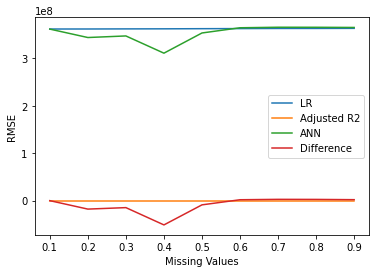

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]

dataset=apple[['Close','Volume']]
results_ap=pd.DataFrame(columns=['Size','RMSE LR','Adjusted R2','RMSE ANN','Difference','stdev'])
results_ap['Size']=sizes

for i in range(9):

  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_missing=dataset.sample(n=round(1023*sizes[i]))
  
  ##Get the mean value of the non missing values
  list_not_missing=[]
  for j in range(1023) :
    if j not in fixationX_missing.index :
      list_not_missing.append(j)

  not_missing=pd.DataFrame(columns=dataset.columns)
  for k in list_not_missing:
    not_missing=not_missing.append(dataset.iloc[k,:])

  not_missing_mean=statistics.mean(not_missing["Close"])
  #print("not missing mean",not_missing_mean)

  ## Assign the mean to the missing values
  
  for l in  fixationX_missing.index :
    dataset.loc[l,"Close"]=not_missing_mean
  
  new_mean=statistics.mean(dataset["Close"])

  #print("dataset new mean =",new_mean)

  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}'.format(sizes[i]))
  #plt.show()

  ######training the models
  ###Linear Regression
  X=dataset[["Close"]]
  y=dataset['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  
  results_ap.iloc[i,1]=rmse_test
  results_ap.iloc[i,2]=adj_r2
  
  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test['start timestamp [ns]']
  #b = X_test['end timestamp [ns]']
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Vs Test Fixation, Missing Values ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  results_ap.iloc[i,3]=rmse_test

  #variance of the target variable in the missing values sample
  results_ap.iloc[i,5]=statistics.stdev(dataset["Close"])

  i+=1


results_ap['Difference']=results_ap['RMSE ANN']-results_ap['RMSE LR']
print(results_ap)
x = results_ap['Size']
#Y = results[['RMSE LR','Adjusted R2','RMSE ANN','Difference']]
fig,axes=plt.subplots()
plt.plot(x,results_ap['RMSE LR'],label="LR")
plt.plot(x,results_ap['Adjusted R2'],label="Adjusted R2")
plt.plot(x,results_ap['RMSE ANN'],label="ANN")
plt.plot(x,results_ap['Difference'],label="Difference")

plt.xlabel("Missing Values")
plt.ylabel("RMSE")
plt.legend()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

   Size          RMSE LR Adjusted R2         RMSE ANN      Difference  \
0   0.1  16452732.349367    0.036748  16524498.460733    71766.111367   
1   0.2  16471097.888111    0.035021  15036719.623795 -1434378.264316   
2   0.3  16488768.959021     0.03145  15013242.757984 -1475526.201037   
3   0.4  16543515.159603    0.026844  16385610.629683  -157904.529919   
4   0.5  16585117.714012    0.023216  16612063.520544    26945.806532   
5   0.6  16601309.154342    0.020375  16814114.050203   212804.895862   
6   0.7  16641463.766926    0.016713  16814114.050503   172650.283577   
7   0.8  16667793.399601     0.01334   16172520.11159  -495273.288011   
8   0.9  16690422.622304    0.009917  16814114.050508   123691.428204   

        stdev  
0  117.858389  
1  117.099702  
2   114.40714  
3  109.954531  
4  105.257443  
5   99.966415  
6   92.569431  
7   84.733686  
8   78.473003  


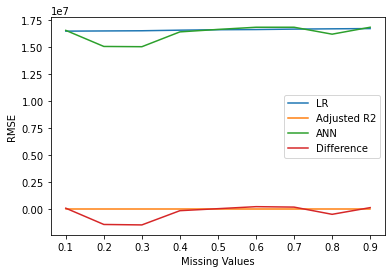

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]

dataset=netflix[['Close','Volume']]
results_nt=pd.DataFrame(columns=['Size','RMSE LR','Adjusted R2','RMSE ANN','Difference','stdev'])
results_nt['Size']=sizes

for i in range(9):

  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_missing=dataset.sample(n=round(1023*sizes[i]))
  
  ##Get the mean value of the non missing values
  list_not_missing=[]
  for j in range(1023) :
    if j not in fixationX_missing.index :
      list_not_missing.append(j)

  not_missing=pd.DataFrame(columns=dataset.columns)
  for k in list_not_missing:
    not_missing=not_missing.append(dataset.iloc[k,:])

  not_missing_mean=statistics.mean(not_missing["Close"])
  #print("not missing mean",not_missing_mean)

  ## Assign the mean to the missing values
  
  for l in  fixationX_missing.index :
    dataset.loc[l,"Close"]=not_missing_mean
  
  new_mean=statistics.mean(dataset["Close"])

  #print("dataset new mean =",new_mean)

  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}'.format(sizes[i]))
  #plt.show()

  ######training the models
  ###Linear Regression
  X=dataset[["Close"]]
  y=dataset['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  
  results_nt.iloc[i,1]=rmse_test
  results_nt.iloc[i,2]=adj_r2
  
  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test['start timestamp [ns]']
  #b = X_test['end timestamp [ns]']
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Vs Test Fixation, Missing Values ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  results_nt.iloc[i,3]=rmse_test

  #variance of the target variable in the missing values sample
  results_nt.iloc[i,5]=statistics.stdev(dataset["Close"])

  i+=1


results_nt['Difference']=results_nt['RMSE ANN']-results_nt['RMSE LR']
print(results_nt)
x = results_nt['Size']
#Y = results[['RMSE LR','Adjusted R2','RMSE ANN','Difference']]
fig,axes=plt.subplots()
plt.plot(x,results_nt['RMSE LR'],label="LR")
plt.plot(x,results_nt['Adjusted R2'],label="Adjusted R2")
plt.plot(x,results_nt['RMSE ANN'],label="ANN")
plt.plot(x,results_nt['Difference'],label="Difference")

plt.xlabel("Missing Values")
plt.ylabel("RMSE")
plt.legend()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

   Size         RMSE LR Adjusted R2        RMSE ANN     Difference       stdev
0   0.1  6317619.692866    0.277877   5742100.41296 -575519.279906  381.910741
1   0.2  6421600.628766     0.25213  6260027.037982 -161573.590784  378.182714
2   0.3  6558798.604344     0.21942  5958409.016763 -600389.587581  371.725945
3   0.4  6737465.108393    0.185964  6605579.964696 -131885.143696  362.504996
4   0.5  6887162.878003    0.154161  6614924.027066 -272238.850937  348.116415
5   0.6   7050317.10476    0.124123  6864574.633557 -185742.471203  329.588362
6   0.7  7164085.031016    0.099191  7022955.872753 -141129.158263  308.042483
7   0.8   7265094.51911    0.076097  7175151.042737  -89943.476373  280.937904
8   0.9  7356472.273417    0.056023  7245900.703392 -110571.570025  251.930927


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


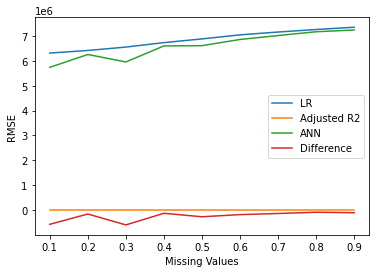

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import random
from random import sample
import seaborn as sns


sizes=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]

dataset=google[['Close','Volume']]
results_gg=pd.DataFrame(columns=['Size','RMSE LR','Adjusted R2','RMSE ANN','Difference','stdev'])
results_gg['Size']=sizes

for i in range(9):

  #sampling
  ##selecting the sample that is supposed to have missing values
  fixationX_missing=dataset.sample(n=round(1023*sizes[i]))
  
  ##Get the mean value of the non missing values
  list_not_missing=[]
  for j in range(1023) :
    if j not in fixationX_missing.index :
      list_not_missing.append(j)

  not_missing=pd.DataFrame(columns=dataset.columns)
  for k in list_not_missing:
    not_missing=not_missing.append(dataset.iloc[k,:])

  not_missing_mean=statistics.mean(not_missing["Close"])
  #print("not missing mean",not_missing_mean)

  ## Assign the mean to the missing values
  
  for l in  fixationX_missing.index :
    dataset.loc[l,"Close"]=not_missing_mean
  
  new_mean=statistics.mean(dataset["Close"])

  #print("dataset new mean =",new_mean)

  ##Plot the distribution of sample with missing values
  #y=fixationX['fixation x [px]'].to_numpy()
  #y=y.reshape(-1,1)
  #ploting the distribution
  #axes=sns.distplot(y)
  #plt.title('Missing values size = {}'.format(sizes[i]))
  #plt.show()

  ######training the models
  ###Linear Regression
  X=dataset[["Close"]]
  y=dataset['Volume']
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=0)

  sc= StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)

  model_lr = LinearRegression()
  model_lr.fit(X_train,y_train)

  #print the model parameters
  #print("Inercept : ",model_lr.intercept_)
  #print("Slope : ",model_lr.coef_)

  #evaluate the model
  y_pred_test = model_lr.predict(X_test)
  y_pred_train = model_lr.predict(X_train)

  #testing performance

  rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
  rmse_training=np.sqrt(mean_squared_error(y_train,y_pred_train))
  correlation=LinearRegression()
  correlation=correlation.fit(X,y)
  r2= correlation.score(X,y)
  adj_r2=1 - (1-r2)*(len(y)-1)/(len(y)-X_test.shape[1]-1)
  
  
  results_gg.iloc[i,1]=rmse_test
  results_gg.iloc[i,2]=adj_r2
  
  #fig,axes= plt.subplots(nrows=2)
  #ax1=axes[0]
  #ax2=axes[1]

  #testing performance graph

  #ax1= plt.axes(projection ='3d')

  #a =X_test['start timestamp [ns]']
  #b = X_test['end timestamp [ns]']
  #c= y_test

  #ax1.scatter3D(a, b, c, 'blue')
  #ax1.scatter3D(a, b, y_pred_test,color='red' )
  #ax1.set_title('Model=LR,Predicted Vs Test Fixation, Missing Values ={}'.format(sizes[i]))
  #plt.show()

  ###ANN
  model_ann=MLPRegressor(activation='logistic',solver='lbfgs')
  Fixation_position= model_ann.fit(X_train,y_train)
  y_pred =Fixation_position.predict(X_test)

  #print(classifier.predict(X_test))
  rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
  results_gg.iloc[i,3]=rmse_test

  #variance of the target variable in the missing values sample
  results_gg.iloc[i,5]=statistics.stdev(dataset["Close"])

  i+=1


results_gg['Difference']=results_gg['RMSE ANN']-results_gg['RMSE LR']
print(results_gg)
x = results_gg['Size']
#Y = results[['RMSE LR','Adjusted R2','RMSE ANN','Difference']]
fig,axes=plt.subplots()
plt.plot(x,results_gg['RMSE LR'],label="LR")
plt.plot(x,results_gg['Adjusted R2'],label="Adjusted R2")
plt.plot(x,results_gg['RMSE ANN'],label="ANN")
plt.plot(x,results_gg['Difference'],label="Difference")

plt.xlabel("Missing Values")
plt.ylabel("RMSE")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

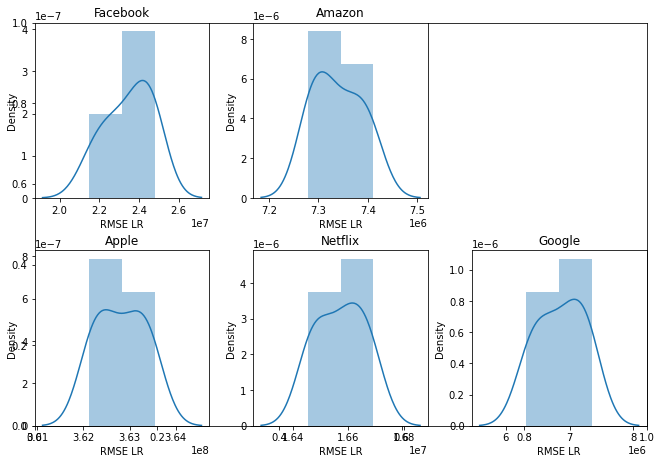

In [ ]:
from matplotlib.pylab import title
from scipy.stats import shapiro
from scipy.stats import kstest
import matplotlib.gridspec as gridspec

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots()
gs = gridspec.GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

sns.distplot(results_fb['RMSE LR'],ax=ax1).set(title="Facebook")
sns.distplot(results_am['RMSE LR'],ax=ax2).set(title="Amazon")
sns.distplot(results_ap['RMSE LR'],ax=ax3).set(title="Apple")
sns.distplot(results_nt['RMSE LR'],ax=ax4).set(title="Netflix")
sns.distplot(results_gg['RMSE LR'],ax=ax5).set(title="Google")
fig.set_figheight(7)
fig.set_figwidth(10)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)


In [ ]:
#perform Kolmogorov-Smirnov test


normality=pd.DataFrame(columns=['Dataset','S-W statistic','S-W p-value','K-S statistic','K-S p-value'])
normality['Dataset']=['Facebook','Apple','Amazon','Netflix','Google']



#s1,p1=shapiro(results_fix['RMSE LR'])
s2,p2=shapiro(results_fb['RMSE LR'])
s3,p3=shapiro(results_ap['RMSE LR'])
s4,p4=shapiro(results_am['RMSE LR'])
s5,p5=shapiro(results_nt['RMSE LR'])
s6,p6=shapiro(results_gg['RMSE LR'])


normality['S-W statistic']=[s2,s3,s4,s5,s6]
normality['S-W p-value']=[p2,p3,p4,p5,p6]

#fix=results_fix['RMSE LR'].values.tolist()
fb=results_fb['RMSE LR'].values.tolist()
ap=results_ap['RMSE LR'].values.tolist()
am=results_am['RMSE LR'].values.tolist()
nt=results_nt['RMSE LR'].values.tolist()
gg=results_gg['RMSE LR'].values.tolist()

#s1,p1=kstest(fix, 'norm')
s2,p2=kstest(fb, 'norm')
s3,p3=kstest(ap, 'norm')
s4,p4=kstest(am, 'norm')
s5,p5=kstest(nt, 'norm')
s6,p6=kstest(gg, 'norm')

normality['K-S statistic']=[s2,s3,s4,s5,s6]
normality['K-S p-value']=[p2,p3,p4,p5,p6]

print(normality)


    Dataset  S-W statistic  S-W p-value  K-S statistic  K-S p-value
0  Facebook       0.931026     0.491181            1.0          0.0
1     Apple       0.929240     0.474139            1.0          0.0
2    Amazon       0.929289     0.474604            1.0          0.0
3   Netflix       0.936980     0.550499            1.0          0.0
4    Google       0.945818     0.644285            1.0          0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

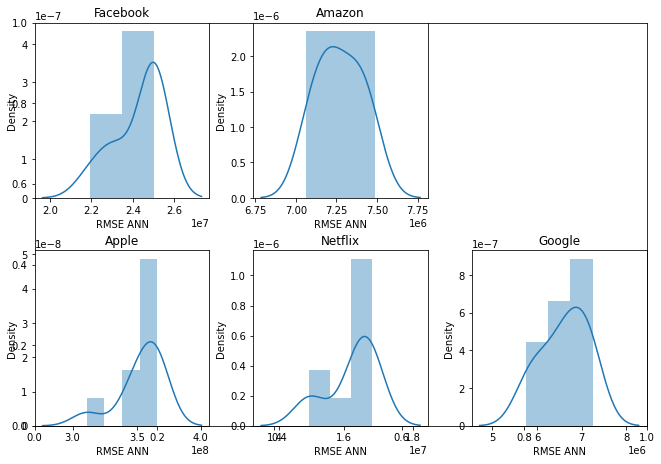

In [ ]:
from matplotlib.pylab import title
from scipy.stats import shapiro
from scipy.stats import kstest
import matplotlib.gridspec as gridspec

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots()
gs = gridspec.GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

sns.distplot(results_fb['RMSE ANN'],ax=ax1).set(title="Facebook")
sns.distplot(results_am['RMSE ANN'],ax=ax2).set(title="Amazon")
sns.distplot(results_ap['RMSE ANN'],ax=ax3).set(title="Apple")
sns.distplot(results_nt['RMSE ANN'],ax=ax4).set(title="Netflix")
sns.distplot(results_gg['RMSE ANN'],ax=ax5).set(title="Google")
fig.set_figheight(7)
fig.set_figwidth(10)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)


In [ ]:
#perform Kolmogorov-Smirnov test

#s1,p1=shapiro(results_fix['RMSE ANN'])
s2,p2=shapiro(results_fb['RMSE ANN'])
s3,p3=shapiro(results_ap['RMSE ANN'])
s4,p4=shapiro(results_am['RMSE ANN'])
s5,p5=shapiro(results_nt['RMSE ANN'])
s6,p6=shapiro(results_gg['RMSE ANN'])

normality=pd.DataFrame()
normality['Dataset']=['Facebook','Apple','Amazon','Netflix','Google']
normality['S-W statistic']=[s2,s3,s4,s5,s6]
normality['S-W p-value']=[p2,p3,p4,p5,p6]

#fix=results_fix['RMSE ANN'].values.tolist()
fb=results_fb['RMSE ANN'].values.tolist()
ap=results_ap['RMSE ANN'].values.tolist()
am=results_am['RMSE ANN'].values.tolist()
nt=results_nt['RMSE ANN'].values.tolist()
gg=results_gg['RMSE ANN'].values.tolist()

#s1,p1=kstest(fix, 'norm')
s2,p2=kstest(fb, 'norm')
s3,p3=kstest(ap, 'norm')
s4,p4=kstest(am, 'norm')
s5,p5=kstest(nt, 'norm')
s6,p6=kstest(gg, 'norm')

normality['K-S statistic']=[s2,s3,s4,s5,s6]
normality['K-S p-value']=[p2,p3,p4,p5,p6]

print(normality)


    Dataset  S-W statistic  S-W p-value  K-S statistic  K-S p-value
0  Facebook       0.693928     0.001205            1.0          0.0
1     Apple       0.749579     0.005361            1.0          0.0
2    Amazon       0.966597     0.864161            1.0          0.0
3   Netflix       0.761183     0.007306            1.0          0.0
4    Google       0.937762     0.558549            1.0          0.0


In [ ]:
lr=pd.DataFrame()
#lr['fix']=results_fix.iloc[:,1]
lr['fb']=results_fb.iloc[:,1]
lr['ap']=results_ap.iloc[:,1]
lr['am']=results_am.iloc[:,1]
lr['nt']=results_nt.iloc[:,1]
lr['gg']=results_gg.iloc[:,1]
ann=pd.DataFrame()
#ann['fix']=results_fix.iloc[:,3]
ann['fb']=results_fb.iloc[:,3]
ann['ap']=results_ap.iloc[:,3]
ann['am']=results_am.iloc[:,3]
ann['nt']=results_nt.iloc[:,3]
ann['gg']=results_gg.iloc[:,3]



wilcoxon_test=pd.DataFrame(columns=['Dataset','Wilcoxon statistic','p-value'])
dataset=['Facebook','Apple','Amazon','Netflix','Google']
for i in range(5):
  s1=lr.iloc[:,i].values.flatten()
  s2=ann.iloc[:,i].values.flatten()
  s,p=stats.wilcoxon(s1,s2)
  wilcoxon_test=wilcoxon_test.append({'Dataset':dataset[i],'Wilcoxon statistic':s,'p-value':p},ignore_index=True)
print(wilcoxon_test)


    Dataset  Wilcoxon statistic   p-value
0  Facebook                 6.0  0.054688
1     Apple                14.0  0.359375
2    Amazon                 9.0  0.128906
3   Netflix                17.0  0.570312
4    Google                 0.0  0.003906


In [ ]:
###multicomparison
friedman_test=pd.DataFrame(columns=['Model','Friedman statistic','p-value'])

statistic,pvalue=stats.friedmanchisquare(lr['fb'],lr['ap'],lr['am'],lr['nt'],lr['gg'])
friedman_test=friedman_test.append({'Model':'LR in all datasets','Friedman statistic':statistic,'p-value':pvalue},ignore_index=True)


statistic,pvalue=stats.friedmanchisquare(ann['fb'],ann['ap'],ann['am'],ann['nt'],ann['gg'])
friedman_test=friedman_test.append({'Model':'ANN in all datasets','Friedman statistic':statistic,'p-value':pvalue},ignore_index=True)


print(friedman_test)



                 Model  Friedman statistic       p-value
0   LR in all datasets                36.0  2.893696e-07
1  ANN in all datasets                36.0  2.893696e-07


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


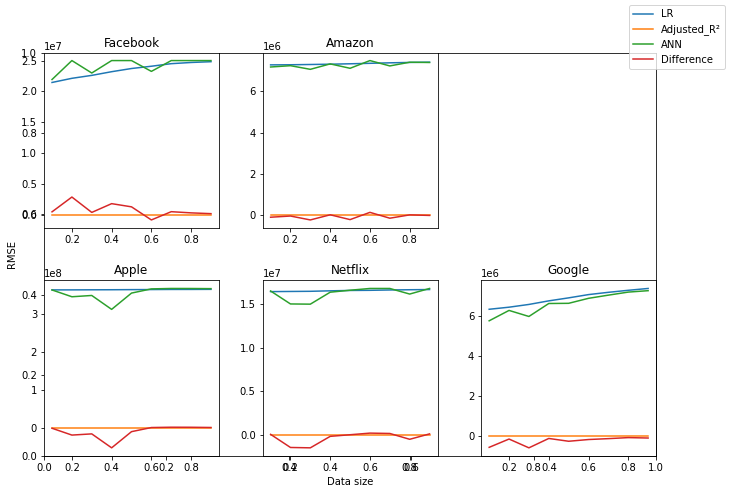

In [ ]:
from matplotlib.pylab import title
from scipy.stats import shapiro
from scipy.stats import kstest
import matplotlib.gridspec as gridspec

import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

fig, axes = plt.subplots()
gs = gridspec.GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
axes.set_xlabel('Data size')
axes.set_ylabel('RMSE')

fig.set_figheight(7)
fig.set_figwidth(10)

plt.subplots_adjust(left=0.05,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.3)

ax1.plot(x,results_fb['RMSE LR'],label="LR")
ax1.plot(x,results_fb['Adjusted R2'],label="Adjusted R2")
ax1.plot(x,results_fb['RMSE ANN'],label="ANN")
ax1.plot(x,results_fb['Difference'],label="Difference")
ax1.title.set_text('Facebook')

ax2.plot(x,results_am['RMSE LR'],label="LR")
ax2.plot(x,results_am['Adjusted R2'],label="Adjusted R2")
ax2.plot(x,results_am['RMSE ANN'],label="ANN")
ax2.plot(x,results_am['Difference'],label="Difference")
ax2.title.set_text('Amazon')

ax3.plot(x,results_ap['RMSE LR'],label="LR")
ax3.plot(x,results_ap['Adjusted R2'],label="Adjusted R2")
ax3.plot(x,results_ap['RMSE ANN'],label="ANN")
ax3.plot(x,results_ap['Difference'],label="Difference")
ax3.title.set_text('Apple')

ax4.plot(x,results_nt['RMSE LR'],label="LR")
ax4.plot(x,results_nt['Adjusted R2'],label="Adjusted R2")
ax4.plot(x,results_nt['RMSE ANN'],label="ANN")
ax4.plot(x,results_nt['Difference'],label="Difference")
ax4.title.set_text('Netflix')

ax5.plot(x,results_gg['RMSE LR'],label="LR")
ax5.plot(x,results_gg['Adjusted R2'],label="Adjusted R2")
ax5.plot(x,results_gg['RMSE ANN'],label="ANN")
ax5.plot(x,results_gg['Difference'],label="Difference")
ax5.title.set_text('Google')
fig.legend([results_gg['RMSE LR'],results_nt['Adjusted R2'],results_nt['RMSE ANN'],results_nt['Difference']],labels=['LR','Adjusted_R²','ANN','Difference'],loc="best")